# Introduction

Imagine you like to go to the gym; however, you hate getting to the gym and finding that it is so crowded that you must wait to use the machines you want.

The task is to use the **“Crowdedness at the Campus Gym”** dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.


Use the `Pandas` library to load the dataset into a DataFrame, run exploratory data analysis, and clean the dataset for training a model.


After cleaning the set, split the data into training and testing sets.

Then, you will use the `SDGRegressor` from the Scikit Learn library to build and train a stochastic gradient descent linear regression model to predict how many people are at the gym on a given day from the features inputed.


Finally, you will evaluate the model and visualize the results using matplotlib.

#Dataset dict:

This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns that contain the following information.

`number_people:` this is the number of people at the gym at each observation. This will be our target variable or label.

`date:` a string value with the specific date and time information.

`timestamp:` an integer (int), with the number of seconds since the start of the day (00:00).

`dayofweek:` an integer (int). 0 is equal to Monday and 6 is equal to Sunday.

`is_weekend:` a Boolean value defining if this observation happened during a weekend. **1** for yes, **0** for no.

`is_holiday`: a Boolean value defining if the observation happened during a holiday. **1** for yes, **0** for no.

`temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.

`isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.

`is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.

`month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.

`hour`: an integer (int) for the hour of the day from 0 to 23.

#Importing libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor


In [ ]:
gym = pd.read_csv("crowdness_gym_data.csv")

#EDA

In [8]:
print(gym.isna().sum())
print(gym.head())
gym.describe()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64
   number_people                       date  timestamp  ...  is_during_semester  month  hour
0             37  2015-08-14 17:00:11-07:00      61211  ...                   0      8    17
1             45  2015-08-14 17:20:14-07:00      62414  ...                   0      8    17
2             40  2015-08-14 17:30:15-07:00      63015  ...                   0      8    17
3             44  2015-08-14 17:40:16-07:00      63616  ...                   0      8    17
4             45  2015-08-14 17:50:17-07:00      64217  ...                   0      8    17

[5 rows x 11 columns]


,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


From first analysis we can conclude that:
1. there are no missing values throughout the columns
1. `timestamp` and `date` columns was splitted in to day, hour. maybe it is not necessary
1. `date` colum was splitted into day, month, year. maybe it is not necessary
1. our target is to predict from **numper_people**  according to other columns

In [29]:
#removing timestamp column

gym_clean = gym.drop(["timestamp","date"],axis=1).copy()
gym_clean


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


#Distribution plot for categorical features

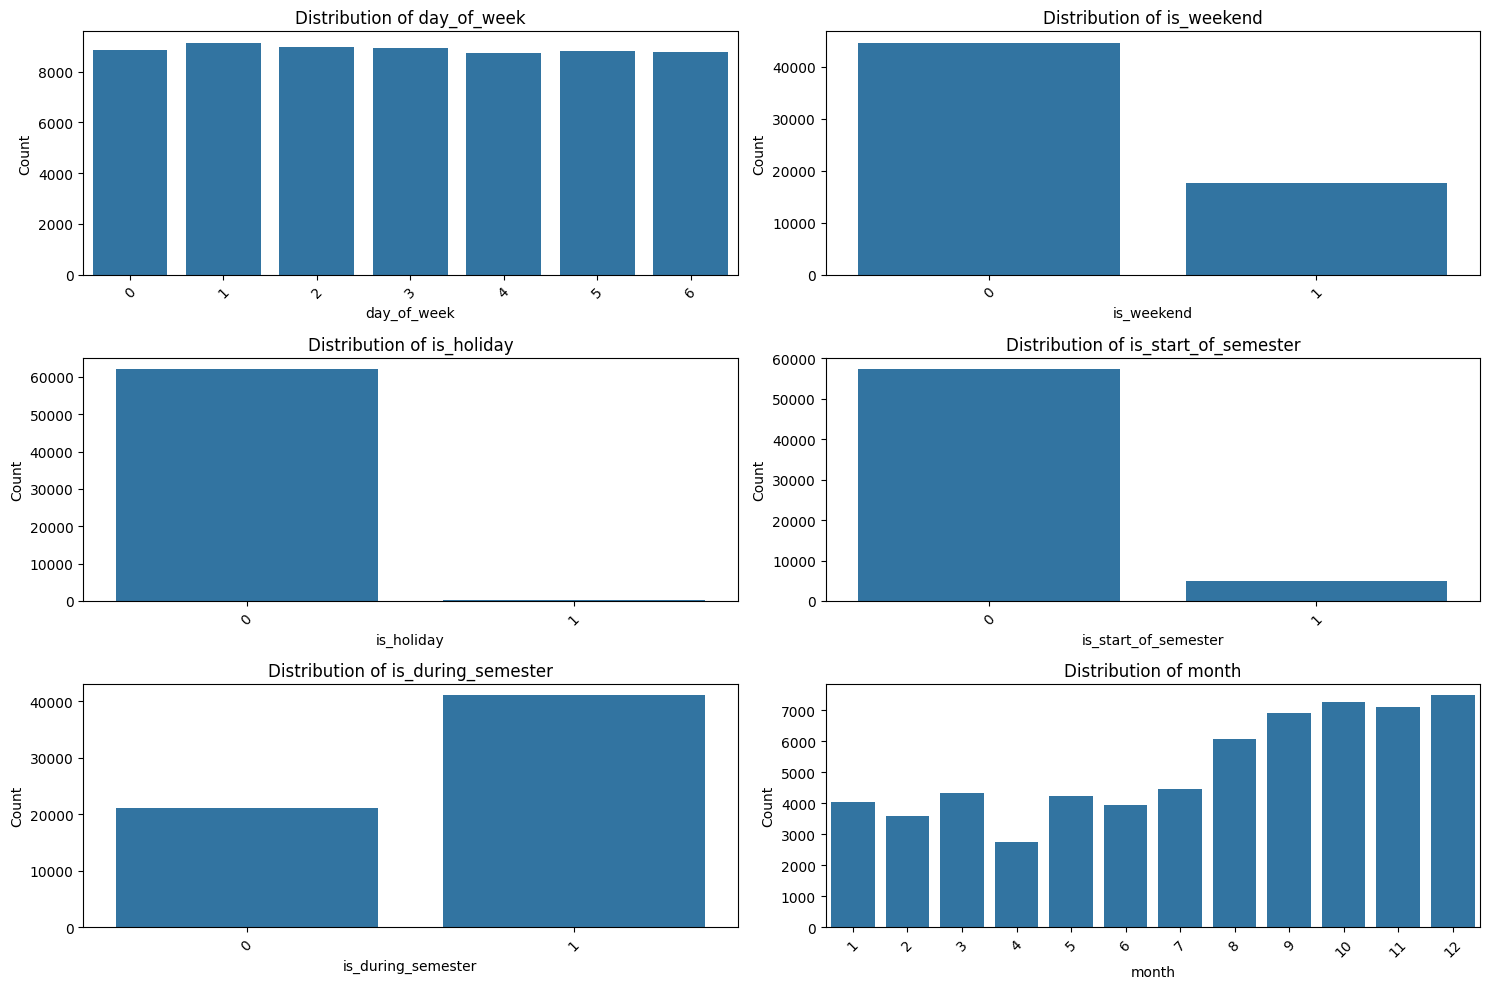

In [32]:
# prompt: plot distribution of categorical vals

# Plotting distributions of categorical features
categorical_features = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester', 'month']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=feature, data=gym)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


#Correlation Matrix

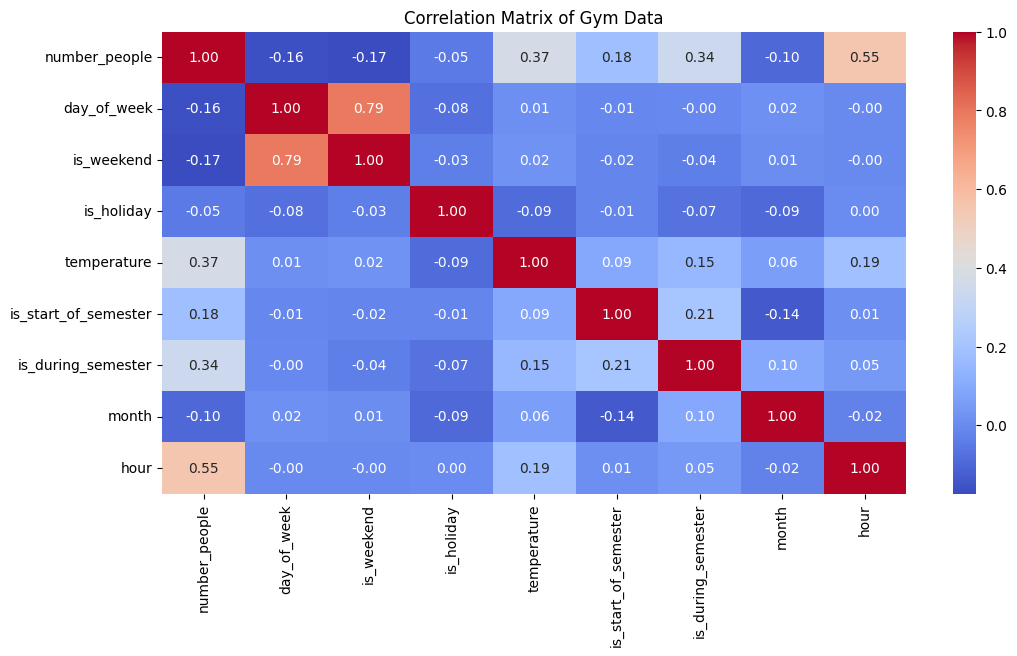

In [19]:
# prompt: correlation matrix with seaborn

# Calculate the correlation matrix
correlation_matrix = gym_clean.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Gym Data')
plt.show()


From heat map above it is possible to see that there are three main factors that contributes to increase in `number_people`

1. hour
1. is_during_semester
1. temperature

# Scatter Plotting Number of People

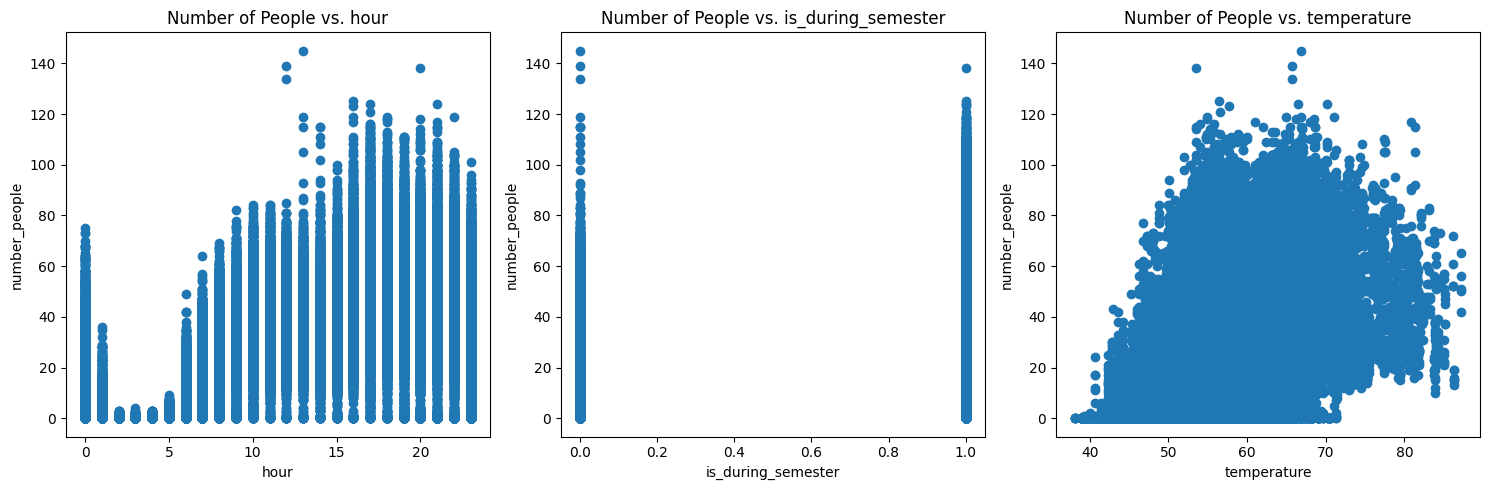

In [20]:
# prompt: generate scatter plot number_people vs main correlation factors

# Identify the main correlation factors
main_factors = ['hour', 'is_during_semester', 'temperature']

# Create the scatter plot
plt.figure(figsize=(15, 5))

for i, factor in enumerate(main_factors):
    plt.subplot(1, 3, i + 1)
    plt.scatter(gym_clean[factor], gym_clean['number_people'])
    plt.xlabel(factor)
    plt.ylabel('number_people')
    plt.title(f'Number of People vs. {factor}')

plt.tight_layout()
plt.show()


# Build Our Model

1. From the SkLearn library, import the following packages:

  * `SGDRegressor` — this will be your main tool to build the model.

  * Train Test Split to split our data into training and testing sets.

  * Mean Square Error, Mean Absolute Error and r2_score to measure the
performance of the model.

  * Optional: Standard Scaler for scaling (normalizing) features.

1. Split the data into train and test sets.

1. Build the SDGRegressor model for training.

1. Train the model. .

In [51]:
#Train, test dataset

X = gym_clean[['hour','is_during_semester','temperature']]
y = gym_clean['number_people']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)

sgdr = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber',
    penalty='elasticnet', random_state = 10)
sgdr.fit(X_train,y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=10)

#Measure the Performance of the Model
Once the model is trained, it's time to measure its performance. For this project, use any of the previously loaded metrics:
* mean_square_error,

* mean_absolute_error

* r2_score.

In [52]:
# prompt: evalute mean_square_error, mean_absolute_error or r2_score.

# Predict on the test set
y_pred = sgdr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mse}")


R-squared: 0.4426412031941954
Mean Absolute Error: 12.874052655964459


Using Hour, is_during_semester and temperature as regressors of number_people gave is a R² score of 36%.

It seems that the model could not predict unseen data properly

# Plot prediction

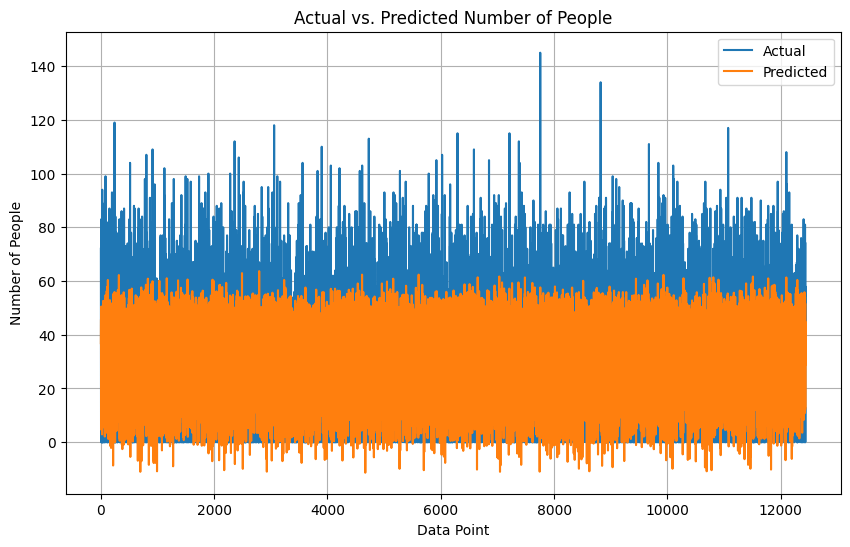

In [53]:
# prompt: Create a line plot that incudes a line for the test data and the predictions from your model.

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Number of People')
plt.title('Actual vs. Predicted Number of People')
plt.legend()
plt.grid(True)
plt.show()


# Summarize Your Results

